In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import iris dataset
data=pd.read_csv('data_car.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
#checking null valuees
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
# Identify percentage of null values
null_percent = (data.isnull().sum()/data.shape[0])*100
null_data_percent = null_percent[null_percent>0]
null_data_percent = pd.DataFrame(null_data_percent,columns=['Percentage of null values'])
null_data_percent.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


In [9]:
# Drop null values
data.dropna(inplace=True)

In [10]:
data.shape

(8084, 16)

In [11]:
# Finding unique values in column 

data["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'McLaren',
       'Maybach', 'Porsche', 'Toyota', 'Saab', 'GMC', 'Hyundai', 'Honda',
       'Cadillac', 'Bentley', 'Ford', 'Oldsmobile', 'Chevrolet', 'Dodge',
       'Lamborghini', 'Lincoln', 'Pontiac', 'Subaru', 'Volkswagen',
       'Spyker', 'Kia', 'Acura', 'Plymouth', 'Rolls-Royce', 'Maserati',
       'Lexus', 'Aston Martin', 'Land Rover', 'Lotus', 'Buick',
       'Infiniti', 'Scion', 'Genesis', 'Suzuki', 'HUMMER', 'Bugatti'],
      dtype=object)

In [12]:
data["Number of Doors"].unique()

array([2., 4., 3.])

In [13]:
data["MSRP"].unique()

array([46135, 40650, 36350, ..., 46120, 50620, 50920])

In [14]:
data["Popularity"].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
        416,   67, 1715, 2031,  376,  549, 1439, 2202, 1624,  520, 5657,
         26, 1385, 1851, 1158,   61,  210,  640,  873,    2, 1720,  204,
        535,   86,  238,  454,  259,  258,  613,  155,  190,  105,   21,
        481,  130,  820])

In [15]:
data["city mpg"].unique()

array([ 19,  20,  18,  17,  16,  26,  23,  22,  21,  24,  15,  29,  28,
        25,  32,  31,  30,  14,  10,  27,  12,  13,   9,  11,   8,  50,
        49,  47,  35,  33,  40,  85,  42,  43,  36,  44,   7,  34, 137,
       129,  39,  41,  37,  53,  55,  51,  54,  58,  38, 128])

In [16]:
data["Year"].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2005, 2006, 2000])

In [17]:
data["Number of Doors"].unique()

array([2., 4., 3.])

In [18]:
data["Popularity"].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
        416,   67, 1715, 2031,  376,  549, 1439, 2202, 1624,  520, 5657,
         26, 1385, 1851, 1158,   61,  210,  640,  873,    2, 1720,  204,
        535,   86,  238,  454,  259,  258,  613,  155,  190,  105,   21,
        481,  130,  820])

In [19]:
#dropping unwanted columns

In [20]:
data = data.drop(labels='Market Category', axis=1)

In [21]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [22]:
# Print correlation matrix
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.244256,-0.046552,0.182905,0.216441,0.180041,0.118304,0.133684
Engine HP,0.244256,1.000000,0.811390,-0.196042,-0.473019,-0.512779,0.038012,0.656662
Engine Cylinders,-0.046552,0.811390,1.000000,-0.178578,-0.603237,-0.615459,0.014825,0.589185
Number of Doors,0.182905,-0.196042,-0.178578,1.000000,0.103413,0.140205,-0.040450,-0.184699
highway MPG,0.216441,-0.473019,-0.603237,0.103413,1.000000,0.821349,0.032504,-0.257585
city mpg,0.180041,-0.512779,-0.615459,0.140205,0.821349,1.000000,0.037057,-0.268003
Popularity,0.118304,0.038012,0.014825,-0.040450,0.032504,0.037057,1.000000,-0.052477
MSRP,0.133684,0.656662,0.589185,-0.184699,-0.257585,-0.268003,-0.052477,1.000000


In [23]:
#heat map

<Axes: >

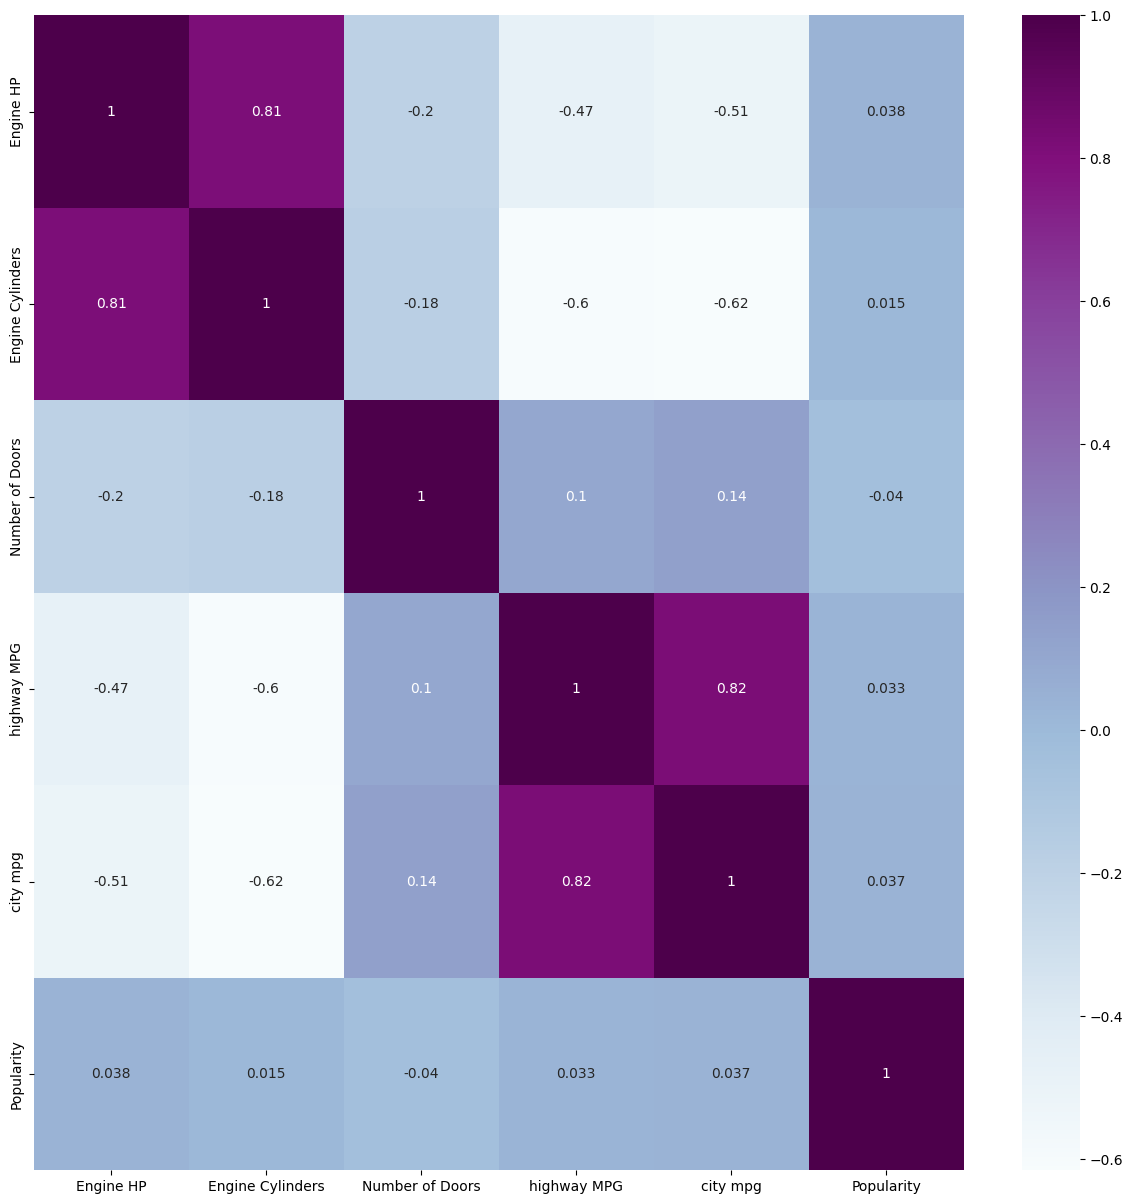

In [24]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [25]:
num_data=num_data=data.select_dtypes(include=['float64','int64'])
num_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [26]:
cat_data=data.select_dtypes(include=['object'])

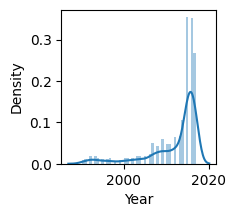

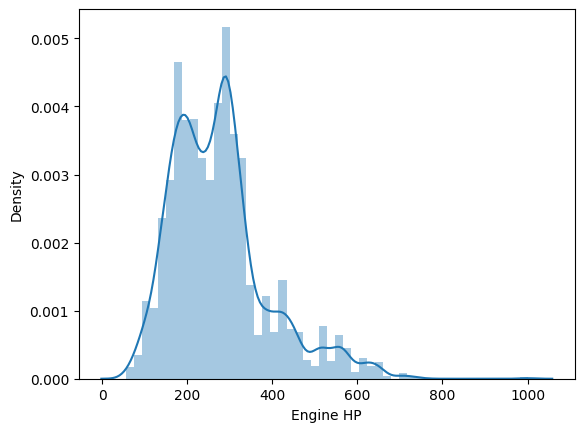

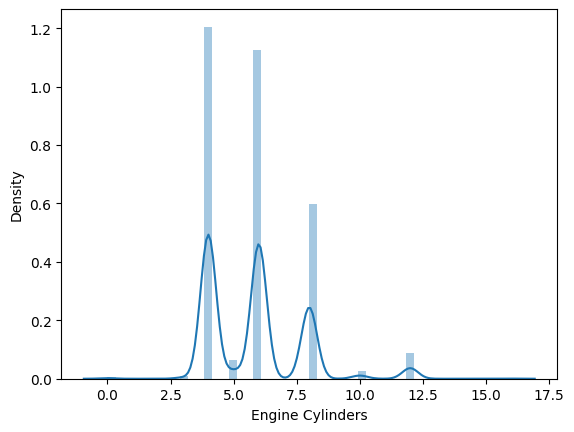

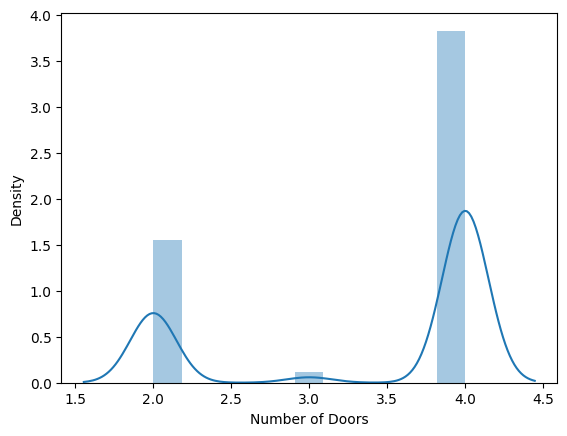

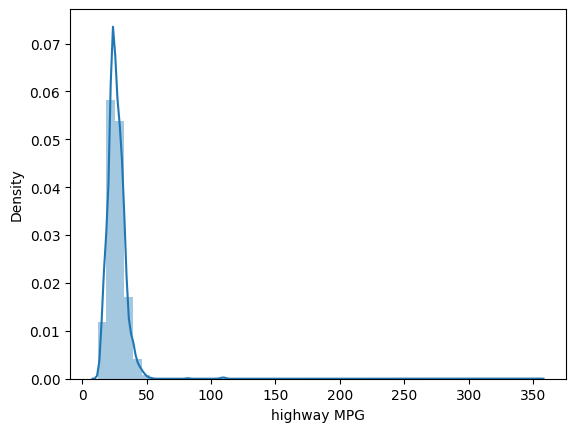

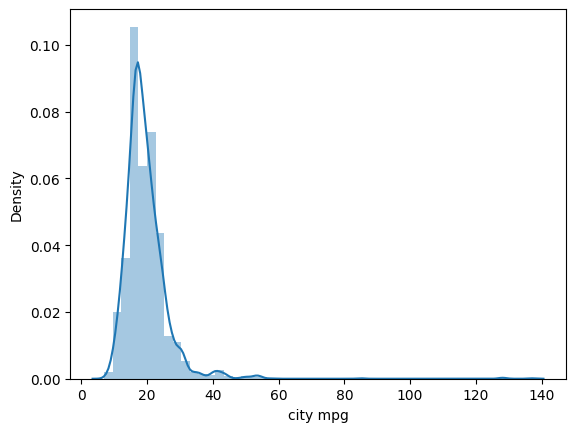

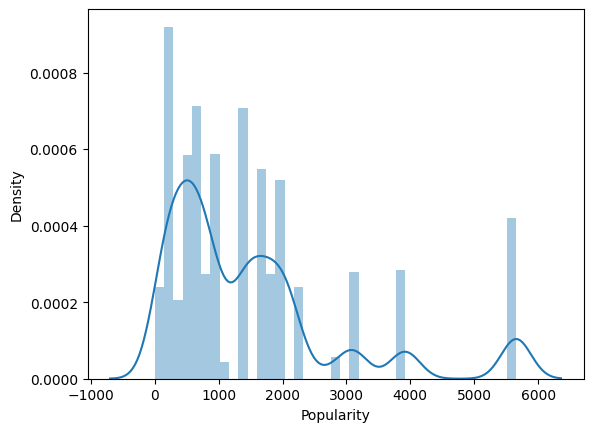

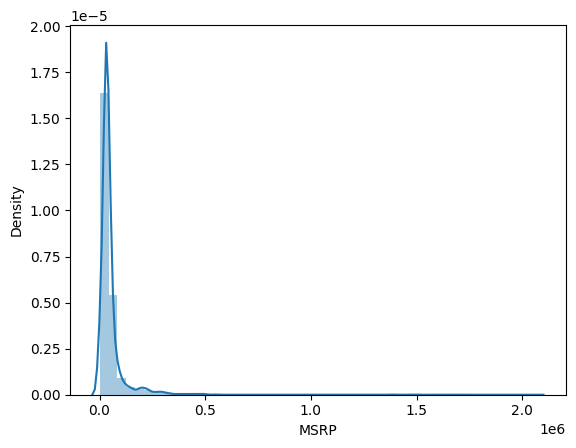

In [27]:
#Distribution plot
plt.figure(figsize=(2,2))
for i in num_data:
  sns.distplot(num_data[i])
  plt.show()

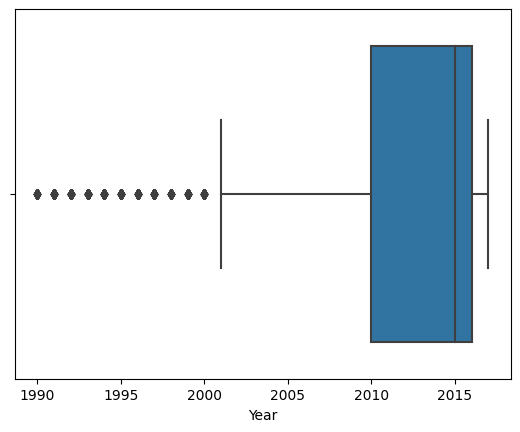

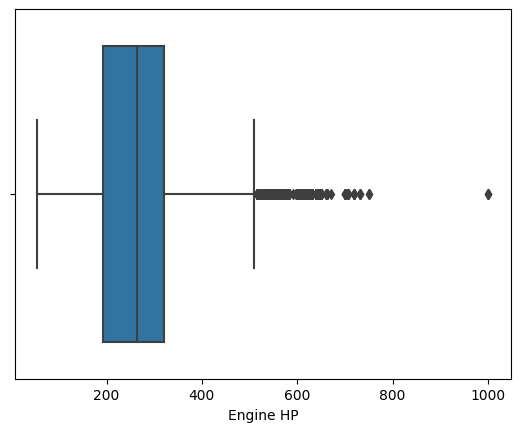

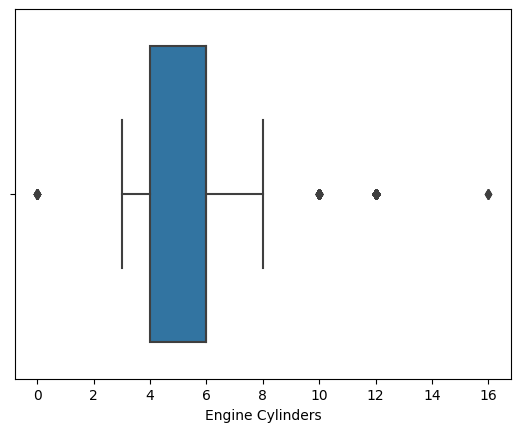

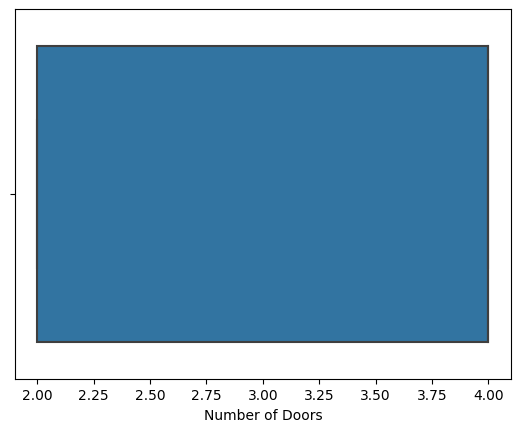

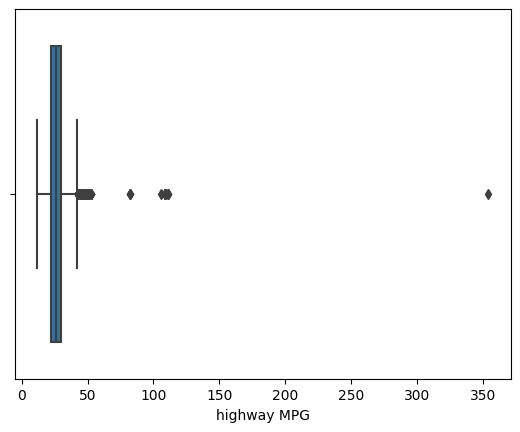

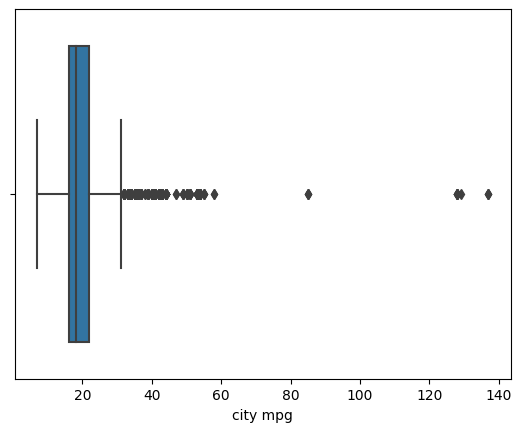

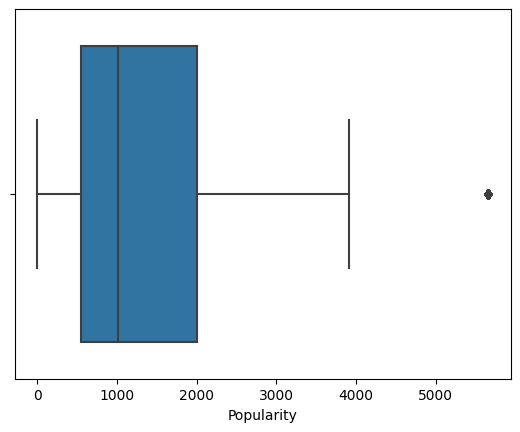

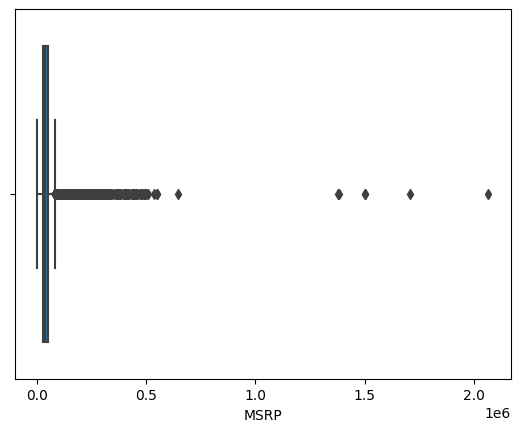

In [28]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

<Figure size 3000x3000 with 0 Axes>

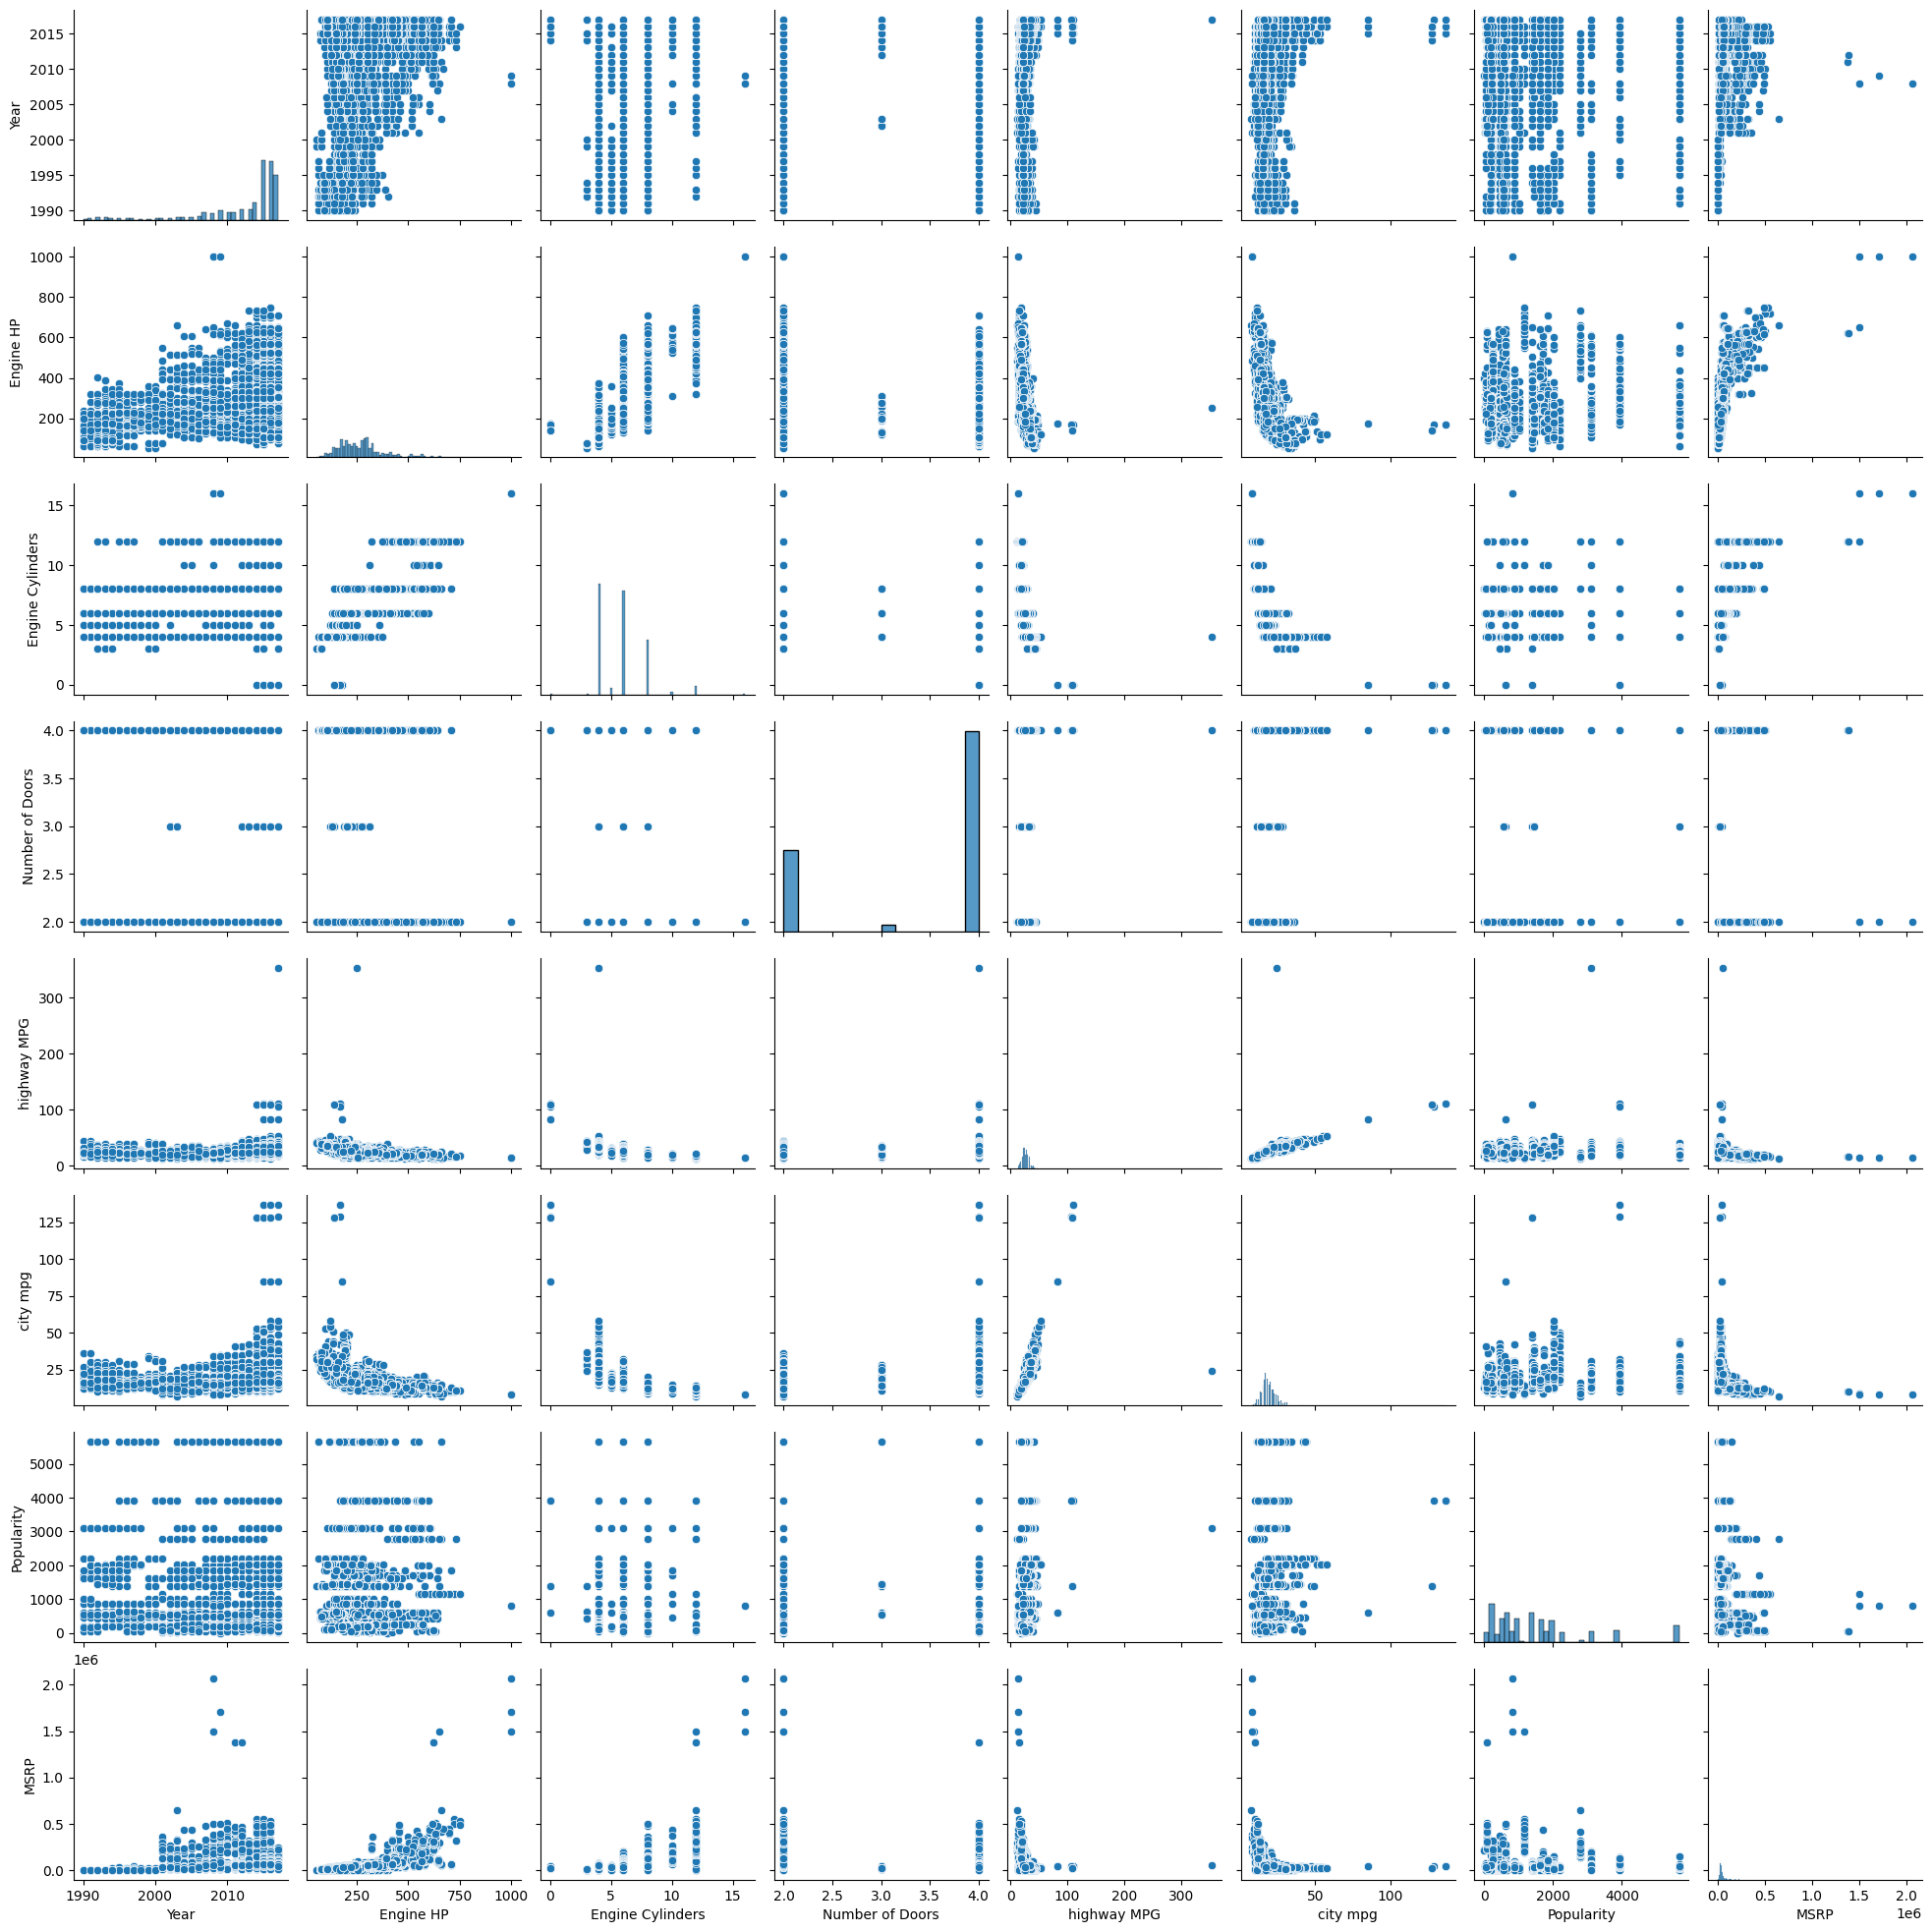

In [29]:
plt.figure(figsize = (30,30))
sns.pairplot(num_data)
plt.show()

# DATA PREPROCESSING

In [30]:
from scipy import stats

In [31]:
# Calculate the IQR
IQR =stats.iqr(data.MSRP,interpolation='midpoint')
IQR

22812.5

In [32]:
Q1=data.MSRP.quantile(0.25)
Q3=data.MSRP.quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-8300.0, 82941.25)

In [33]:
# Remove outliers
data.drop(data[(data['MSRP']>max_limit)].index,inplace=True)
data.loc[data.MSRP>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [34]:
IQR =stats.iqr(data.Popularity,interpolation='midpoint')
IQR
Q1=data.Popularity.quantile(0.25)
Q3=data.Popularity.quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['Popularity']>max_limit)].index,inplace=True)
data.loc[data.Popularity>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [35]:
IQR =stats.iqr(data['city mpg'],interpolation='midpoint')
IQR
Q1=data['city mpg'].quantile(0.25)
Q3=data['city mpg'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['city mpg']>max_limit)].index,inplace=True)
data.loc[data['city mpg']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [36]:
IQR =stats.iqr(data['Engine HP'],interpolation='midpoint')
IQR
Q1=data['Engine HP'].quantile(0.25)
Q3=data['Engine HP'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['Engine HP']>max_limit)].index,inplace=True)
data.loc[data['Engine HP']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [37]:
IQR =stats.iqr(data['highway MPG'],interpolation='midpoint')
IQR
Q1=data['highway MPG'].quantile(0.25)
Q3=data['highway MPG'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['highway MPG']>max_limit)].index,inplace=True)
data.loc[data['highway MPG']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [38]:
IQR =stats.iqr(data['MSRP'],interpolation='midpoint')
IQR
Q1=data['MSRP'].quantile(0.25)
Q3=data['MSRP'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['MSRP']>max_limit)].index,inplace=True)
data.loc[data['MSRP']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [39]:
IQR =stats.iqr(data['Engine Cylinders'],interpolation='midpoint')
IQR
Q1=data['Engine Cylinders'].quantile(0.25)
Q3=data['Engine Cylinders'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers
data.drop(data[(data['Engine Cylinders']>max_limit)].index,inplace=True)
data.drop(data[(data['Engine Cylinders']<min_limit)].index,inplace=True)


In [40]:
IQR =stats.iqr(data['Year'],interpolation='midpoint')
IQR
Q1=data['Year'].quantile(0.25)
Q3=data['Year'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
# Remove outliers

data.drop(data[(data['Year']<min_limit)].index,inplace=True)


# PLOTS AFTER OUTLIER REMOVAL

In [41]:
num_data=num_data=data.select_dtypes(include=['float64','int64'])

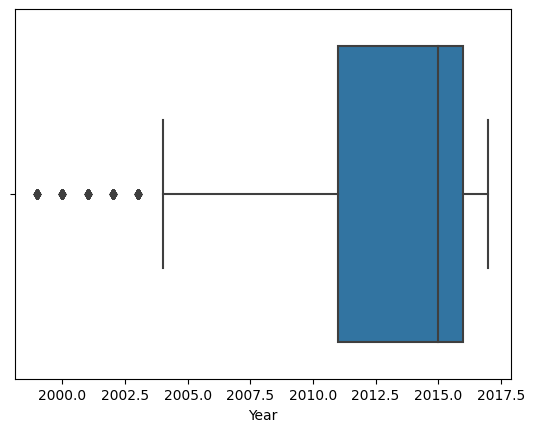

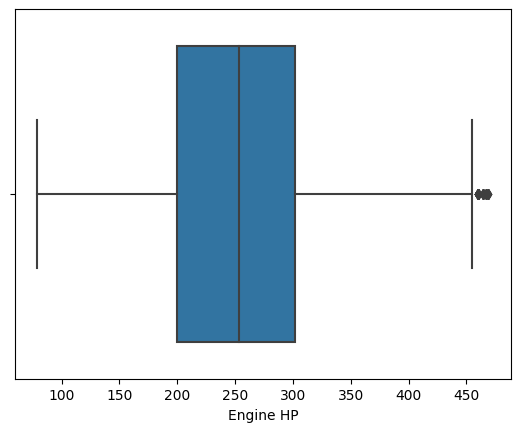

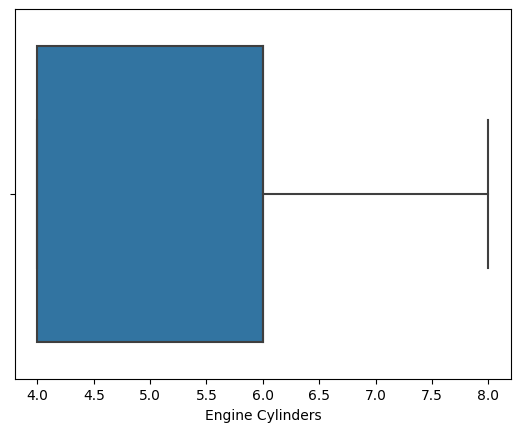

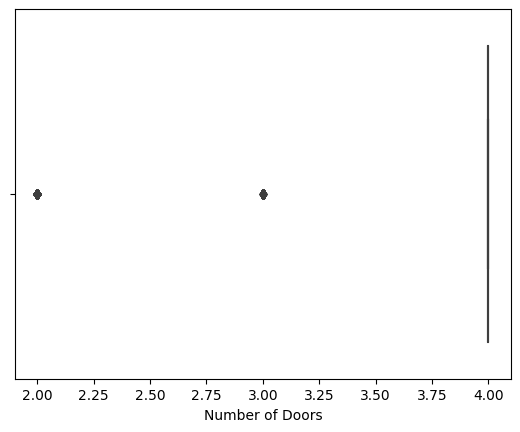

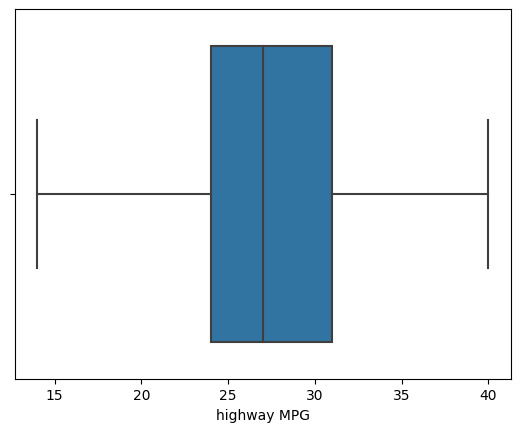

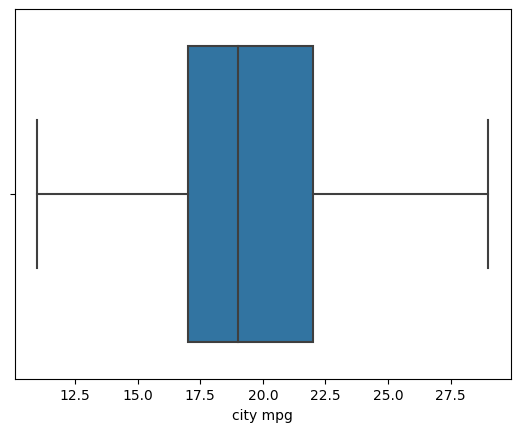

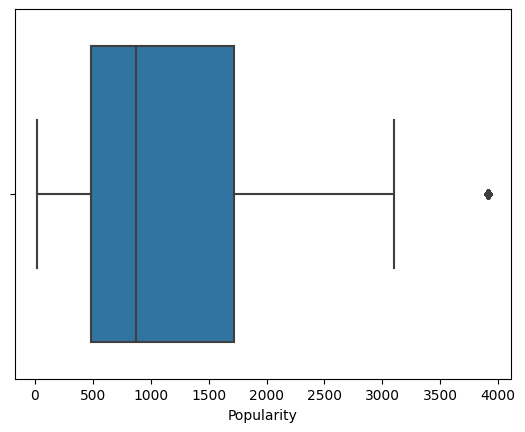

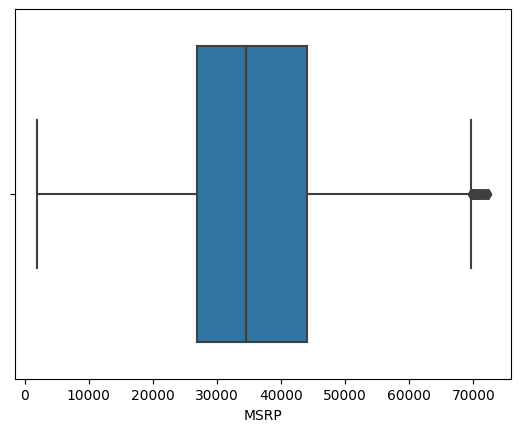

In [42]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

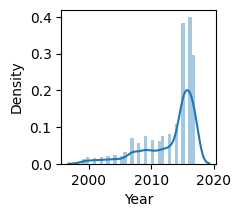

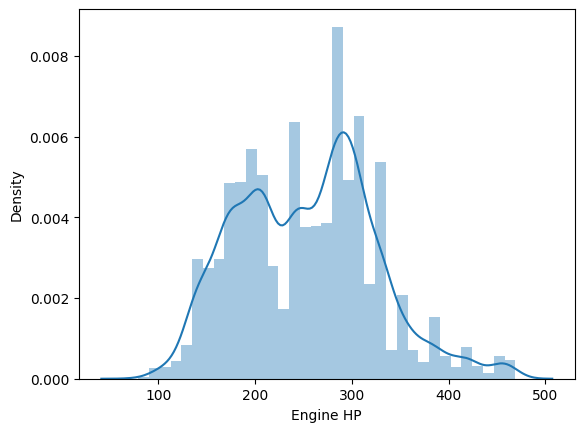

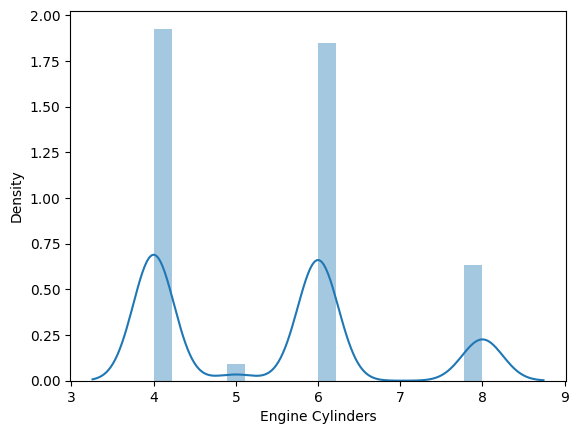

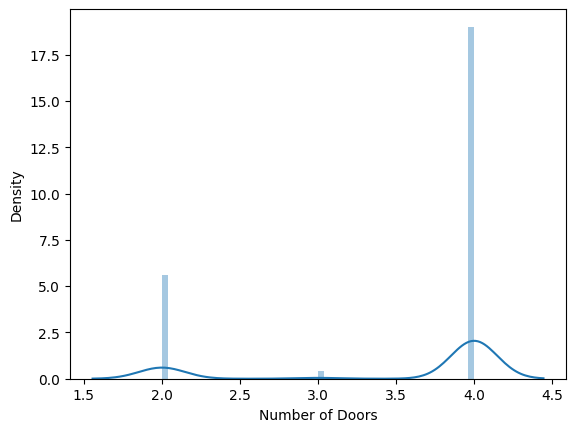

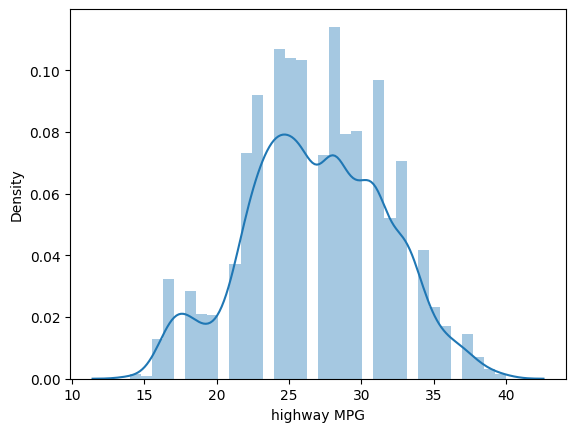

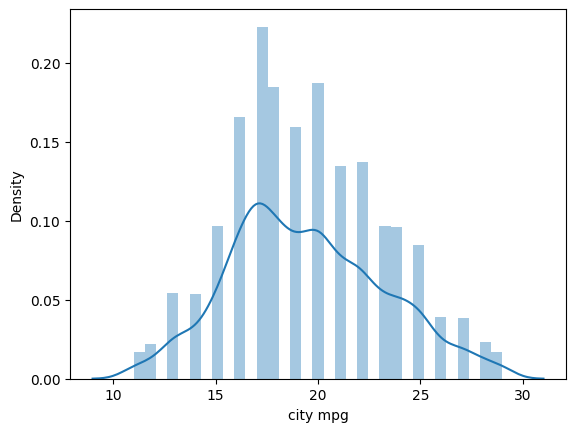

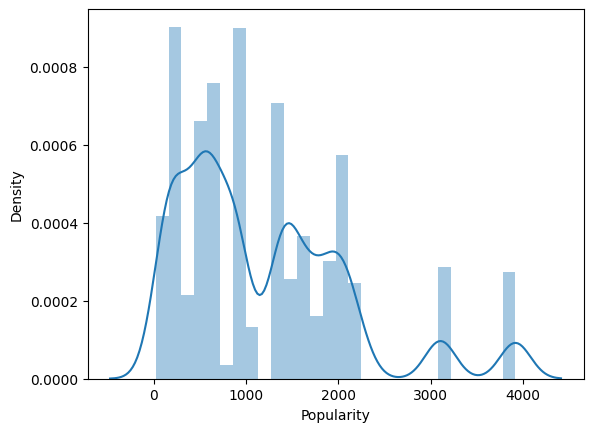

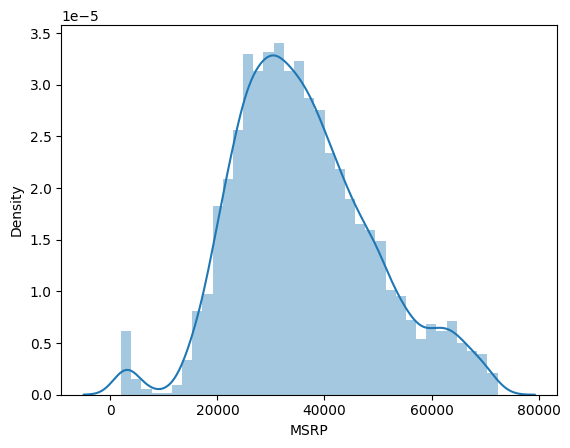

In [43]:
plt.figure(figsize=(2,2))
for i in num_data:
  sns.distplot(num_data[i])
  plt.show()

In [44]:
data.shape

(5639, 15)

# LABEL ENCODING

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               5639 non-null   object 
 1   Model              5639 non-null   object 
 2   Year               5639 non-null   int64  
 3   Engine Fuel Type   5639 non-null   object 
 4   Engine HP          5639 non-null   float64
 5   Engine Cylinders   5639 non-null   float64
 6   Transmission Type  5639 non-null   object 
 7   Driven_Wheels      5639 non-null   object 
 8   Number of Doors    5639 non-null   float64
 9   Vehicle Size       5639 non-null   object 
 10  Vehicle Style      5639 non-null   object 
 11  highway MPG        5639 non-null   int64  
 12  city mpg           5639 non-null   int64  
 13  Popularity         5639 non-null   int64  
 14  MSRP               5639 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 704.9+ KB


In [47]:
le=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size']) 
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               5639 non-null   int64  
 1   Model              5639 non-null   int64  
 2   Year               5639 non-null   int64  
 3   Engine Fuel Type   5639 non-null   int64  
 4   Engine HP          5639 non-null   float64
 5   Engine Cylinders   5639 non-null   float64
 6   Transmission Type  5639 non-null   int64  
 7   Driven_Wheels      5639 non-null   int64  
 8   Number of Doors    5639 non-null   float64
 9   Vehicle Size       5639 non-null   int64  
 10  Vehicle Style      5639 non-null   int64  
 11  highway MPG        5639 non-null   int64  
 12  city mpg           5639 non-null   int64  
 13  Popularity         5639 non-null   int64  
 14  MSRP               5639 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 704.9 KB


<Axes: >

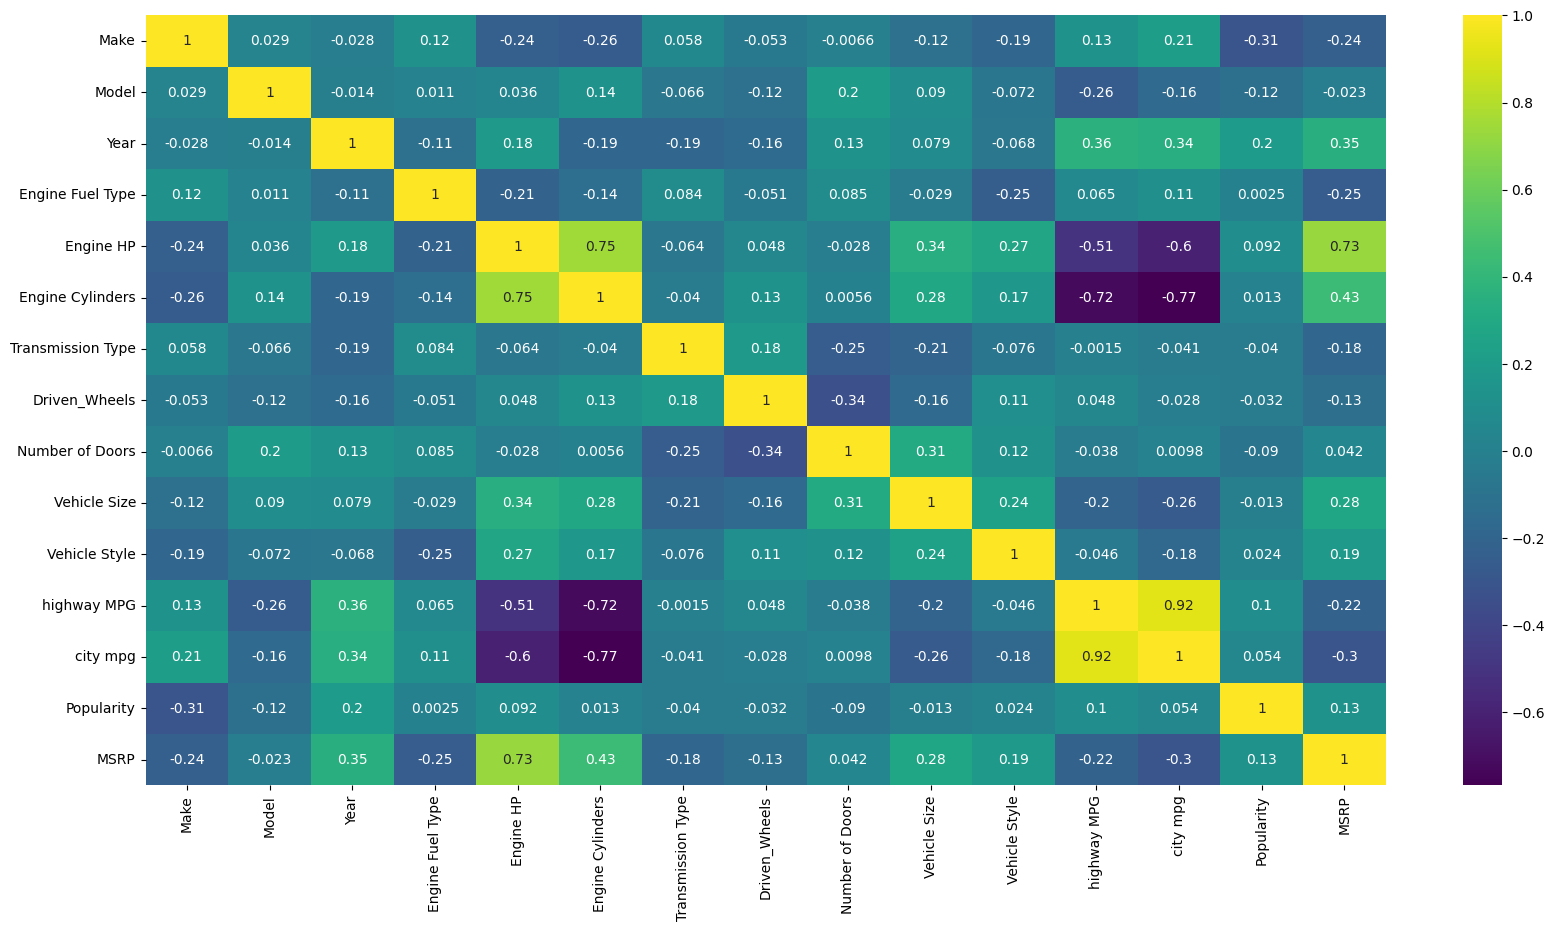

In [49]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [50]:
# Identify column names
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [51]:
# split data into feature and target
x = data.drop(['MSRP'], axis=1)
y = data['MSRP']

# SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
data_scaled.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,0.083333,0.002222,0.666667,0.833333,0.656410,0.5,0.666667,1.0,0.0,0.0,0.533333,0.461538,0.444444,1.0
1,0.083333,0.000000,0.666667,0.833333,0.566667,0.5,0.666667,1.0,0.0,0.0,0.400000,0.538462,0.444444,1.0
2,0.083333,0.000000,0.666667,0.833333,0.566667,0.5,0.666667,1.0,0.0,0.0,0.533333,0.538462,0.500000,1.0
3,0.083333,0.000000,0.666667,0.833333,0.387179,0.5,0.666667,1.0,0.0,0.0,0.533333,0.538462,0.388889,1.0
4,0.083333,0.000000,0.666667,0.833333,0.387179,0.5,0.666667,1.0,0.0,0.0,0.400000,0.538462,0.388889,1.0


# NORMALIZATION

In [54]:
from sklearn import preprocessing
df = preprocessing.normalize(data_scaled)
norm_df = pd.DataFrame(data_scaled, columns=x.columns)
norm_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,0.083333,0.002222,0.666667,0.833333,0.656410,0.5,0.666667,1.0,0.0,0.0,0.533333,0.461538,0.444444,1.0
1,0.083333,0.000000,0.666667,0.833333,0.566667,0.5,0.666667,1.0,0.0,0.0,0.400000,0.538462,0.444444,1.0
2,0.083333,0.000000,0.666667,0.833333,0.566667,0.5,0.666667,1.0,0.0,0.0,0.533333,0.538462,0.500000,1.0
3,0.083333,0.000000,0.666667,0.833333,0.387179,0.5,0.666667,1.0,0.0,0.0,0.533333,0.538462,0.388889,1.0
4,0.083333,0.000000,0.666667,0.833333,0.387179,0.5,0.666667,1.0,0.0,0.0,0.400000,0.538462,0.388889,1.0


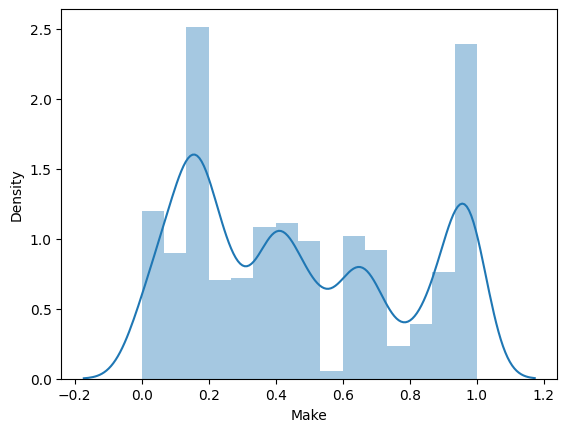

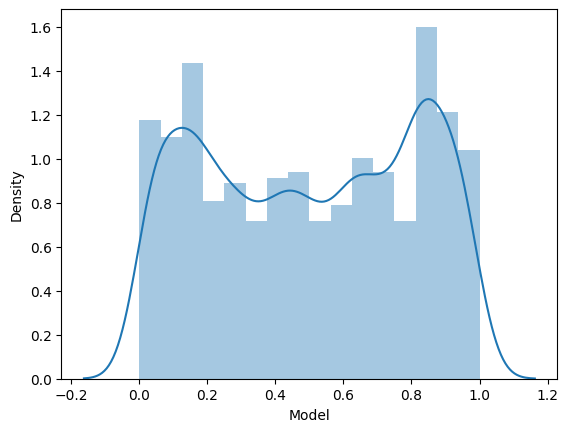

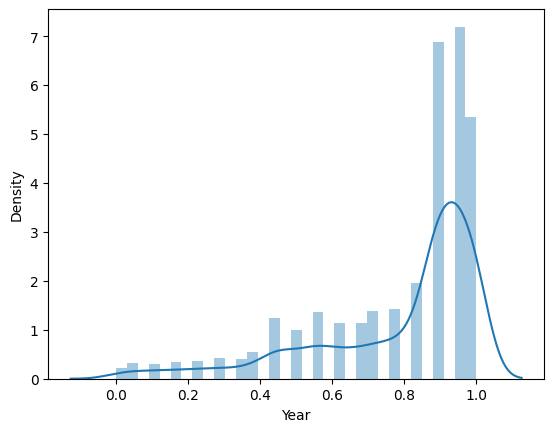

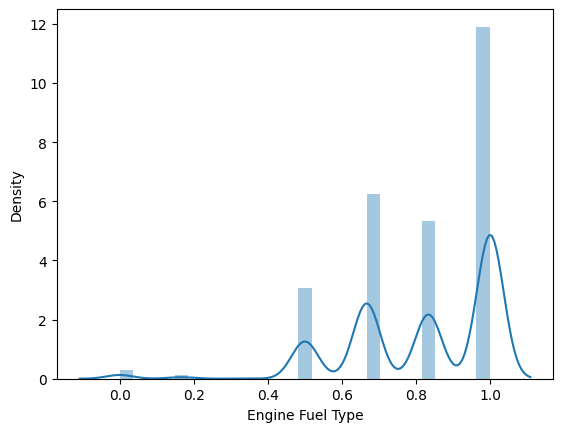

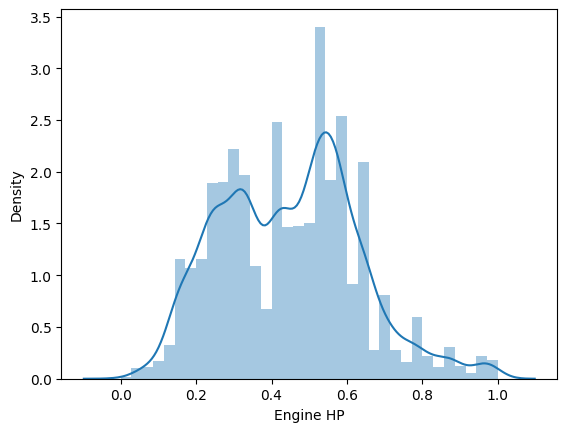

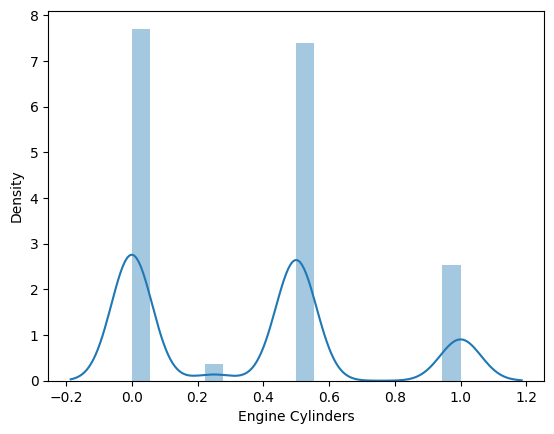

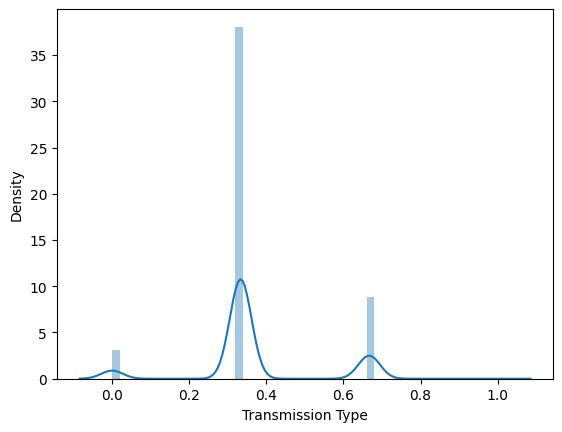

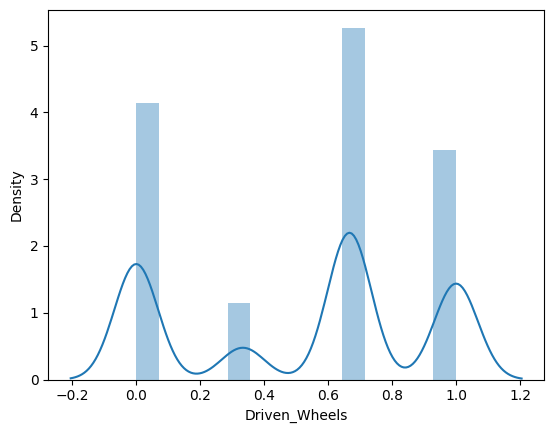

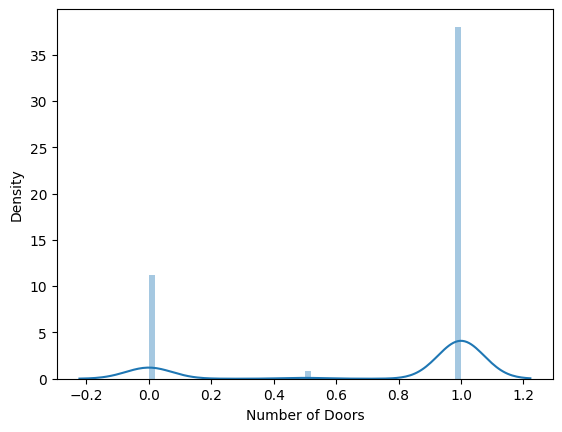

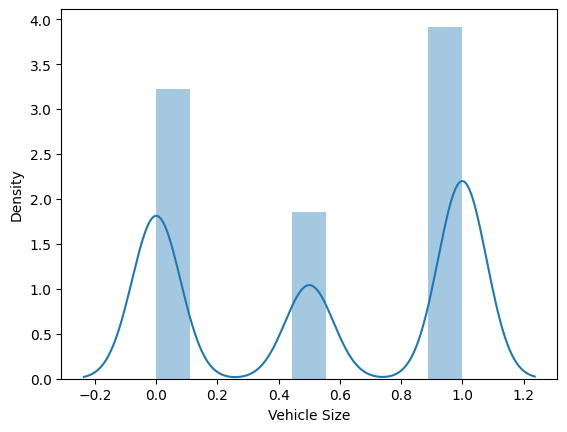

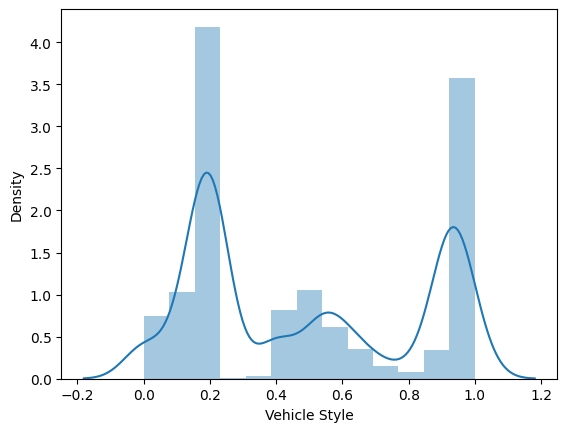

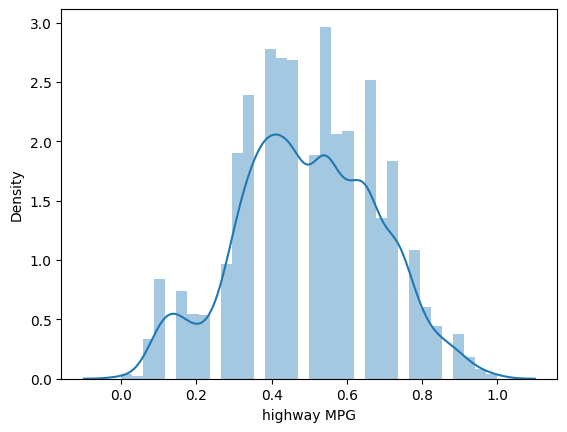

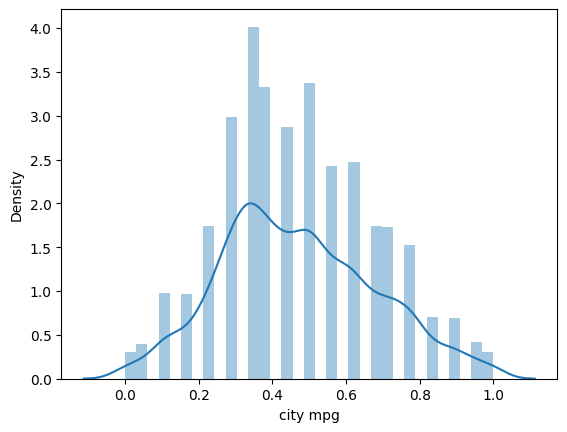

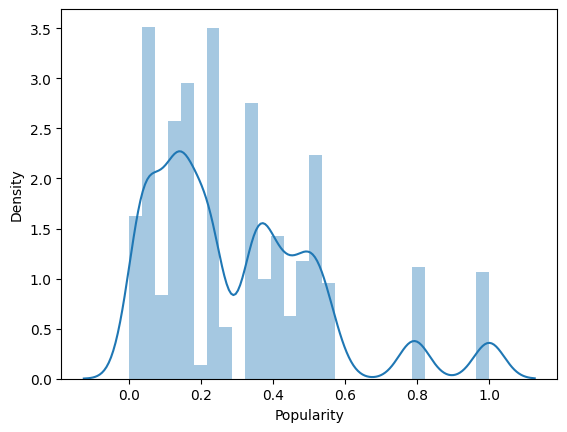

In [55]:
for i in norm_df:
  sns.distplot(norm_df[i])
  plt.show()

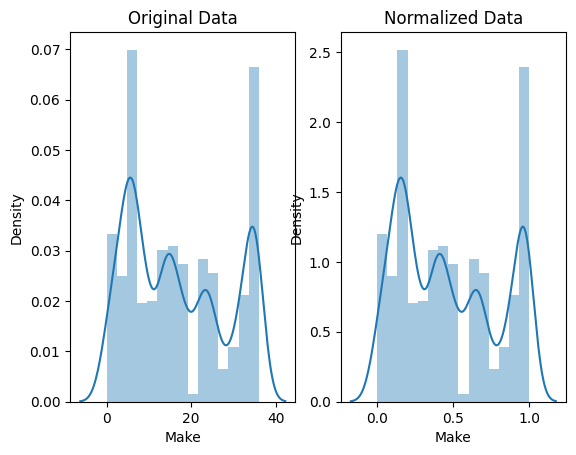

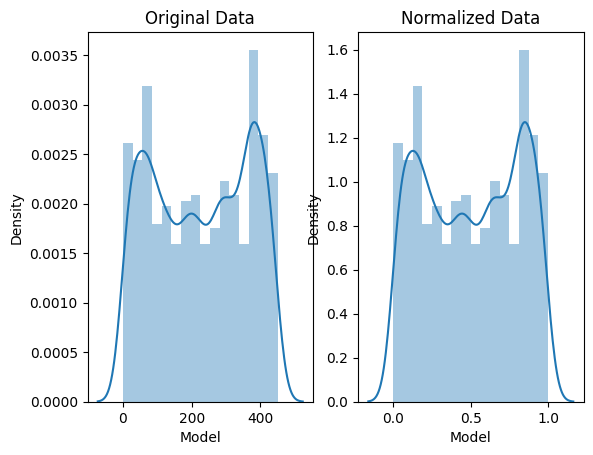

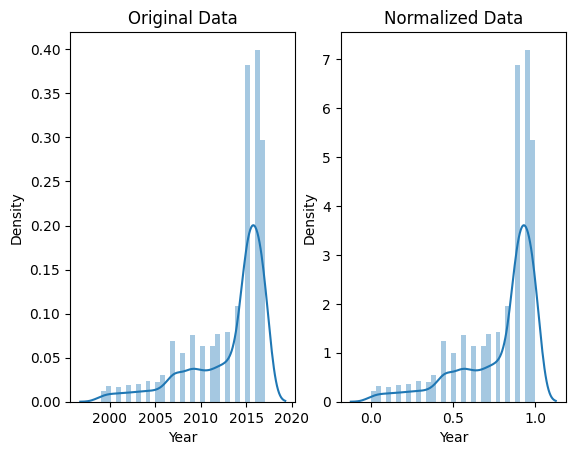

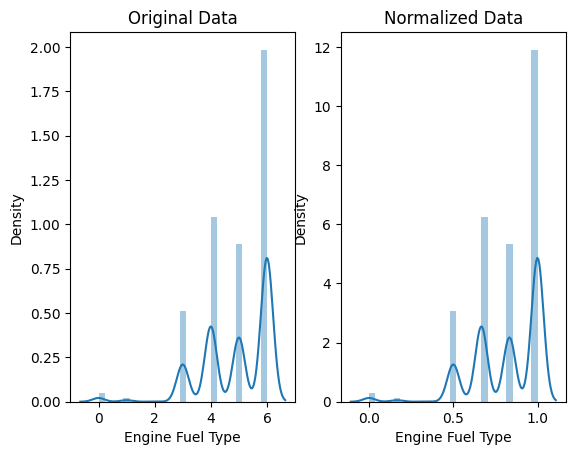

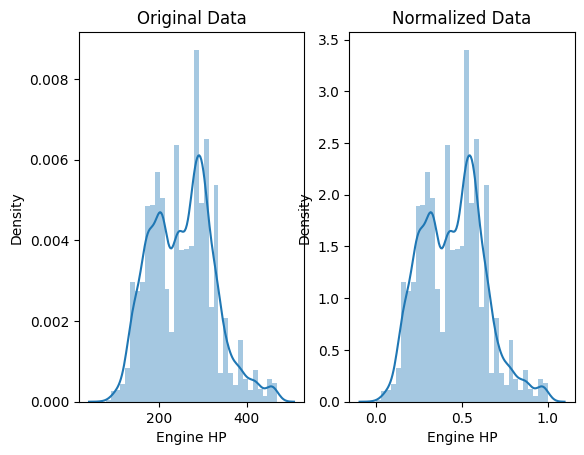

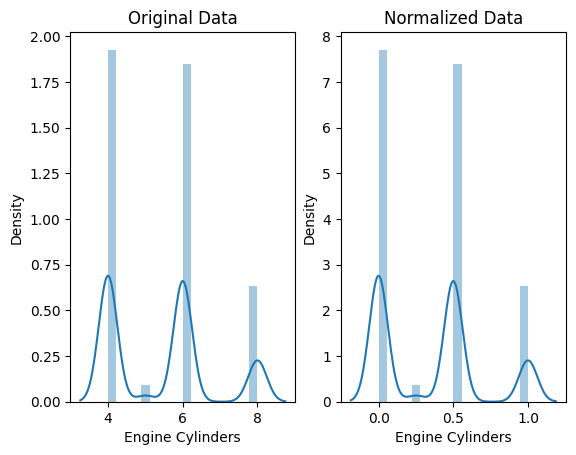

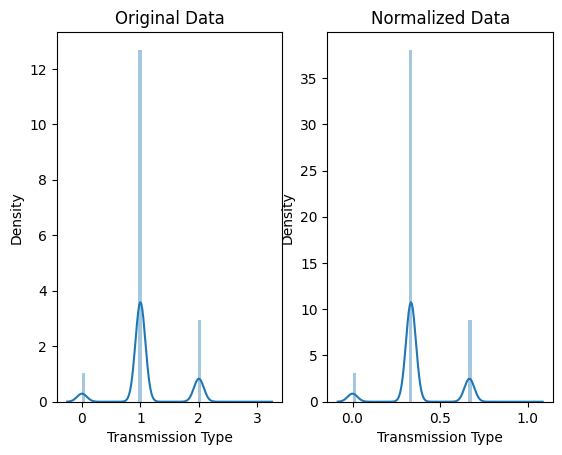

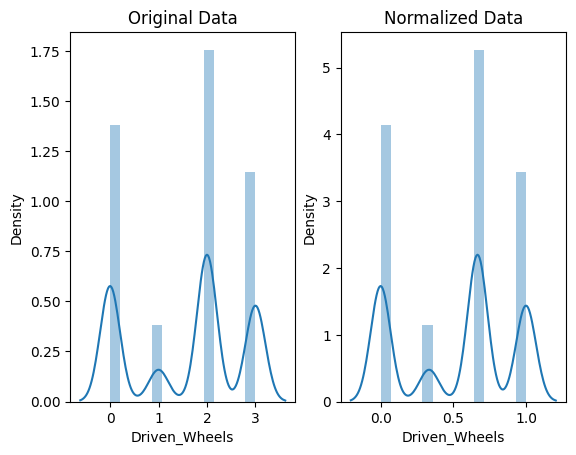

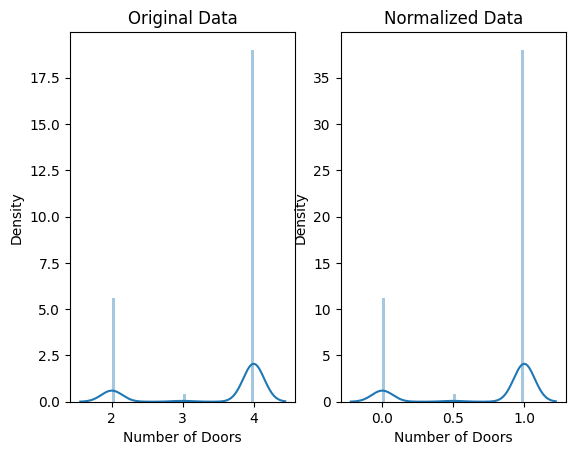

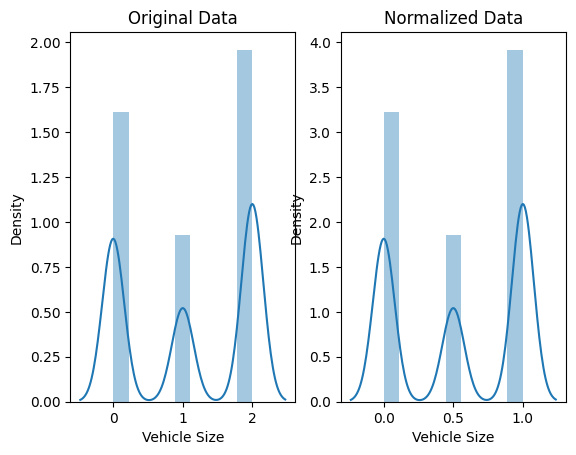

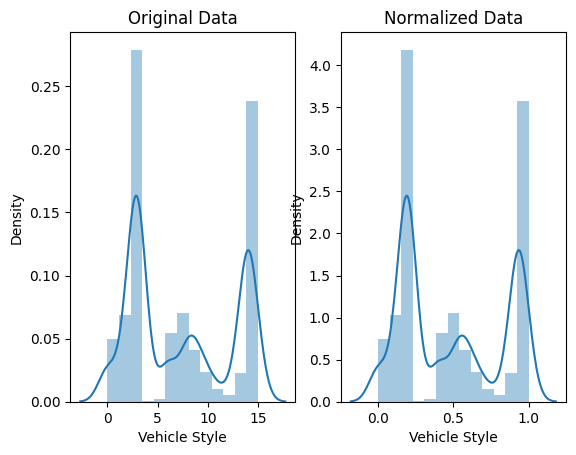

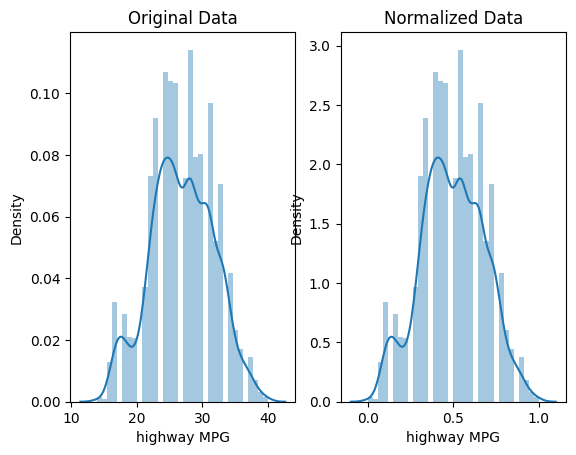

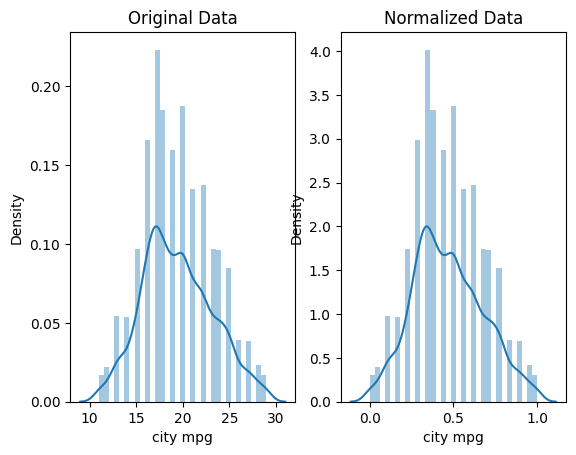

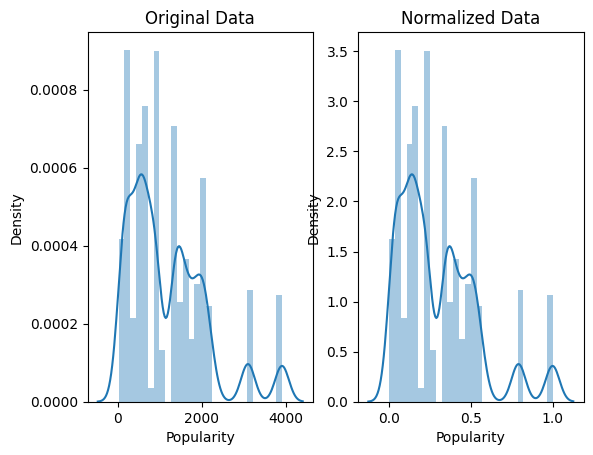

In [56]:

for i in x:
    fig,ax=plt.subplots(1,2)
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(norm_df[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

In [57]:
x = norm_df

In [58]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [60]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



In [61]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error

In [62]:
error_mean_square = []
error_mean_absolute = []
error_mean_square.append(int(mean_squared_error(y_pred, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_pred, y_test)))

In [63]:
error_mean_absolute

[6083]

In [64]:
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Output'])

In [65]:
y_test.to_frame().head()

,MSRP
5171,43900
3601,47625
7646,24600
11241,18000
160,42950


In [66]:
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [67]:
results.head()

,Predicted Output,MSRP
0,40215.847787,43900
1,33971.331874,47625
2,23820.947244,24600
3,19300.193498,18000
4,44324.818376,42950


# Support Vector Regressor

In [68]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Output'])
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [69]:
error_mean_square.append(int(mean_squared_error(y_pred, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_pred, y_test)))

In [70]:
error_mean_absolute

[6083, 10291]

# Decision Tree Regressor


In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:

model = DecisionTreeRegressor(splitter = 'random')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Output'])
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [73]:
error_mean_square.append(int(mean_squared_error(y_pred, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_pred, y_test)))

In [74]:
error_mean_absolute

[6083, 10291, 3244]

# Gradient Boosting Regressor

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Output'])
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [77]:
error_mean_square.append(int(mean_squared_error(y_pred, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_pred, y_test)))

In [78]:
error_mean_absolute

[6083, 10291, 3244, 3639]

# Barplot of machine learning models with mean absolute error

In [79]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor','Decision Tree Regressor', 'Gradient Boosting Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

In [80]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,6083,66460933
1,Support Vector Regressor,10291,174108235
2,Decision Tree Regressor,3244,26026471
3,Gradient Boosting Regressor,3639,23446522


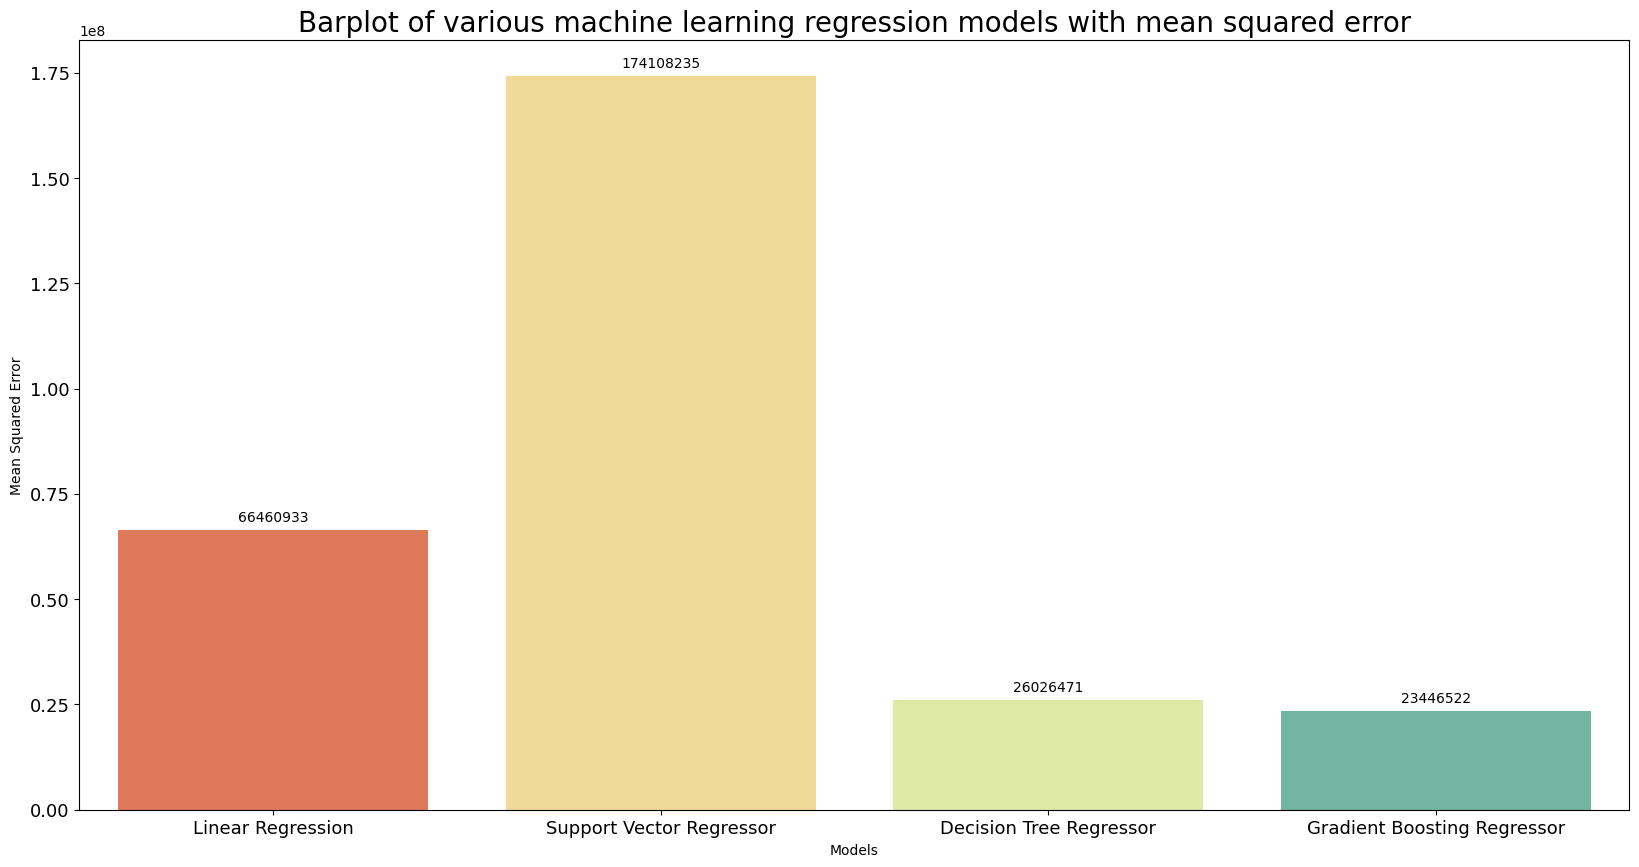

In [81]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

Model with low mse will be the best model so here decision tree regressor has the lowest mse.

HYPERPARAMETER TUNING

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'max_depth': randint(1, 10),  # Randomly select max_depth from 1 to 10
    'min_samples_split': randint(2, 20),  # Randomly select min_samples_split from 2 to 20
    'min_samples_leaf': randint(1, 10),  # Randomly select min_samples_leaf from 1 to 10
}

# Create the Decision Tree Regressor
tree = DecisionTreeRegressor()

# Perform random search cross-validation
random_search = RandomizedSearchCV(tree, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(x, y)  # X and y are your input features and target variable

# Print the best parameters and best MSE score
print("Best Parameters: ", random_search.best_params_)
print("Best MSE Score: ", -random_search.best_score_)

Best Parameters:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 14}
Best MSE Score:  67614851.65278158
